In [1]:
import numpy as np
import matplotlib.pyplot as plt
import string
from scipy.spatial import distance

def hexdec(s):
    return bytes.fromhex(s)

def fixed_xor(b1, b2):
    a = np.frombuffer(b1, 'u1')
    b = np.frombuffer(b2, 'u1')
    return (a ^ b).tobytes()

In [2]:
cipher = hexdec('1b37373331363f78151b7f2b783431333d78397828372d363c78373e783a393b3736')

In [3]:
with open('t8.shakespeare.txt', 'r') as f:
    shks = np.frombuffer(f.read().encode("ASCII"), 'u1')

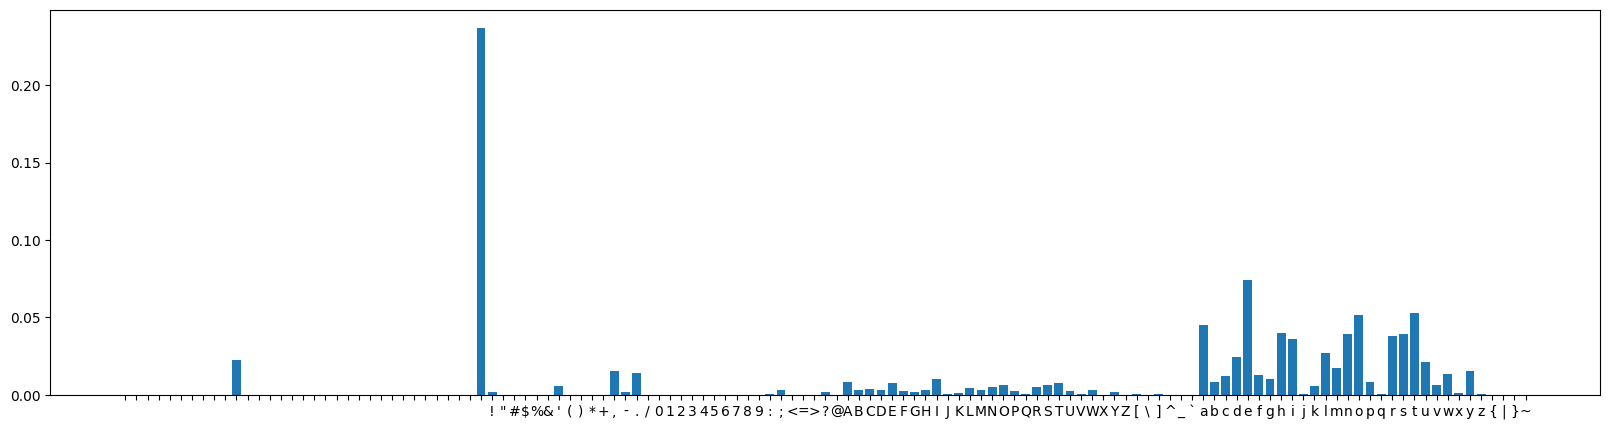

In [4]:
shks_hist = np.histogram(shks, bins=range(128), density=True)
fig, ax = plt.subplots(figsize=(20, 5))
_ = ax.bar(shks_hist[1][:-1], shks_hist[0], tick_label=[chr(c) if chr(c) in string.printable.replace(string.whitespace, '') else '' for c in shks_hist[1][:-1]])

In [5]:
ascii_hist = lambda s: np.histogram(s, bins=range(128), density=True)[0]

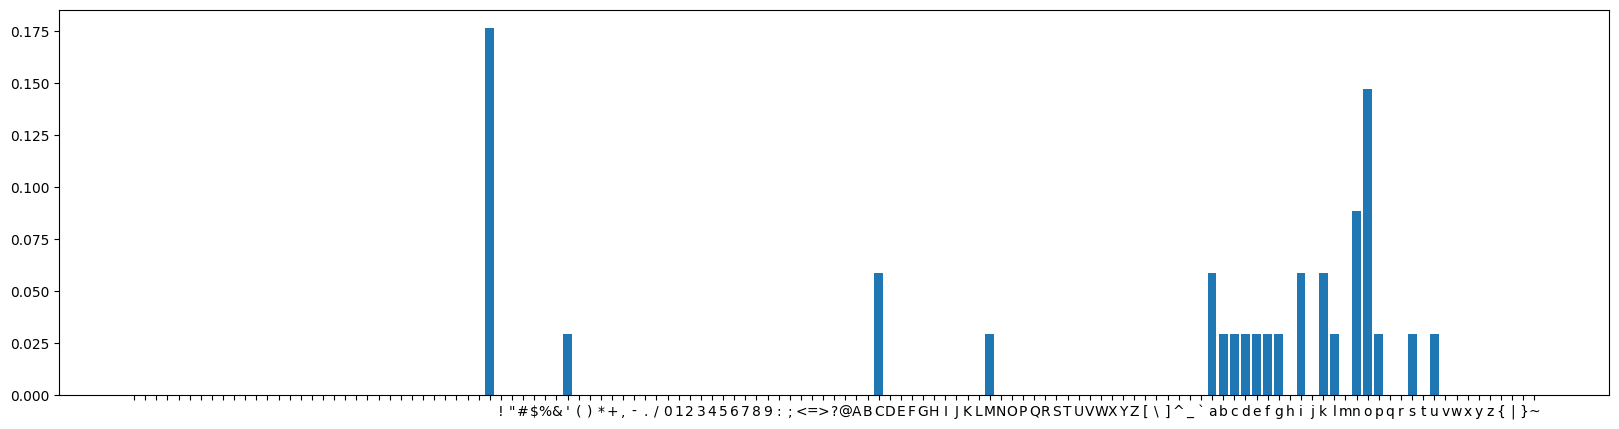

In [6]:
h = ascii_hist(np.frombuffer(fixed_xor(cipher, b'X' * len(cipher)), 'u1'))

fig, ax = plt.subplots(figsize=(20, 5))

_ = ax.bar(range(127), h, tick_label=[chr(c) if chr(c) in string.printable.replace(string.whitespace, '') else '' for c in range(127)])

In [7]:
shks_hist = ascii_hist(shks)

In [8]:
score = lambda buf: distance.jensenshannon(shks_hist, ascii_hist(np.frombuffer(buf, 'u1')))
i2b = lambda i: bytes([i])

In [10]:
evaluation = np.array([score(fixed_xor(cipher, i2b(i) * len(cipher))) for i in range(128)])
i2b(np.argmin(evaluation))

b'X'

In [11]:
def break_sb_xor_key(cipher):
    cipherd = np.frombuffer(cipher, 'u1')
    evaluation = np.array([score(fixed_xor(cipher, i2b(i) * len(cipher))) for i in range(128)])
    return i2b(np.argmin(evaluation))

In [12]:
break_sb_xor_key(cipher)

b'X'

In [13]:
def decipher_sb_xor_key(cipher):
    key = break_sb_xor_key(cipher)
    return fixed_xor(key, cipher)

In [14]:
decipher_sb_xor_key(cipher)

b"Cooking MC's like a pound of bacon"